In [6]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 15:47:06.743976. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [7]:
pref_colors = ['maroon', 'orangered', 'darkgoldenrod', 'olivedrab', 'teal', 
               'steelblue', 'midnightblue', 'darkmagenta', 'black', 'gray']

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 15:47:07.826617. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [8]:
pdb

Automatic pdb calling has been turned ON


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 15:47:09.034375. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [9]:
from dynamics_sims import lqr_sim_Ridge, plot_flow_field_utils, lqr_simulation
from online_analysis import util_fcns

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 15:47:10.865047. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [432]:
#cls_true = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(5, False, R = 7, task='obs')
#cls_shuff = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(5, True, R = 7, task='obs')

#cls_true.run_all_targets(nreps=1, plot_traj = True, subset_targs=np.arange(8))
#cls_shuff.run_all_targets(nreps=1, plot_traj = True, subset_targs=np.arange(8))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 09:44:59.911946. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [19]:
ZeroU = dict();
TrueU = dict();

for i_s, state_noise in enumerate([0., .05, .1, .2, .5, 1., 2., 5., 10.]):
    for i in range(2):
        TrueU[state_noise, i] = dict(u_mn= [], u_tot =[])
        ZeroU[state_noise, i] = dict(u_mn= [], u_tot =[])

    for i_d in range(2):
        for tsk in range(2):
            if tsk == 0:
                task = 'co'
            elif tsk == 1:
                task = 'obs'

            KG = util_fcns.get_decoder('grom', i_d)
            cls_true = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(i_d, False, 
                                                                                 R = .01, 
                                                                                 task=task,
                                                                                state_noise = state_noise)
            cls_shuff = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(i_d, True, 
                                                                                  R = .01,
                                                                                  task=task,
                                                                                 state_noise = state_noise)
            print('#######################')
            print('Starting Day %d' %(i_d))
            trl_tm, tot_u, mn_u = cls_true.run_all_targets(nreps=1, plot_traj = False, 
                                                           subset_targs=np.arange(0, 8, 2))
            TrueU[state_noise, tsk]['u_mn'].append(mn_u)
            TrueU[state_noise, tsk]['u_tot'].append(tot_u)

            trl_tm, tot_u, mn_u = cls_shuff.run_all_targets(nreps=1, plot_traj = False, 
                                                            subset_targs=np.arange(0, 8, 2))
            ZeroU[state_noise, tsk]['u_mn'].append(mn_u)
            ZeroU[state_noise, tsk]['u_tot'].append(tot_u)

#######################
Starting Day 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 1
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 1
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 08:31:30.160082. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [14]:
#### State noise plots #####
pdb

NameError: name 'pdb' is not defined

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 08:28:21.452933. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [32]:
#### Wheres the brain dynamics fixed point; ? 
# A = cls_true.brain.A[:-1, :-1]
# b = cls_true.brain.A[:-1, -1]
# ImA = np.linalg.inv(np.eye(A.shape[0]) - A)
# fp = np.dot(ImA, b)
# print('Norm fixed pt: %.4f'%np.linalg.norm(fp))
# print('Norm fixed pt - brain targ: %.4f' %np.linalg.norm(cls_true.brain_target[:-1] - fp))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 11:06:07.864007. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


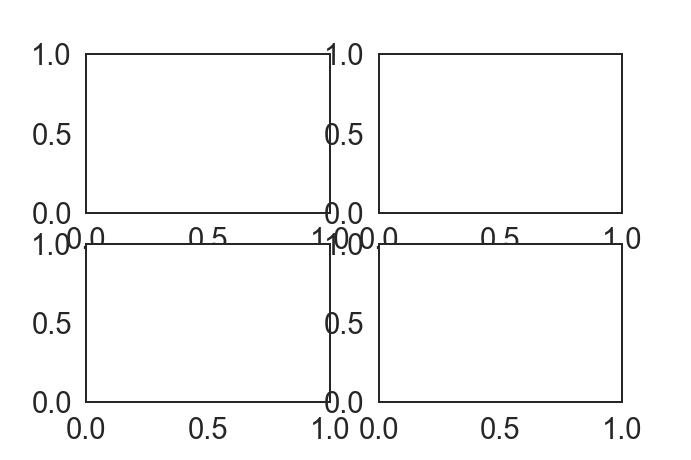

<IPython.core.display.Javascript object>


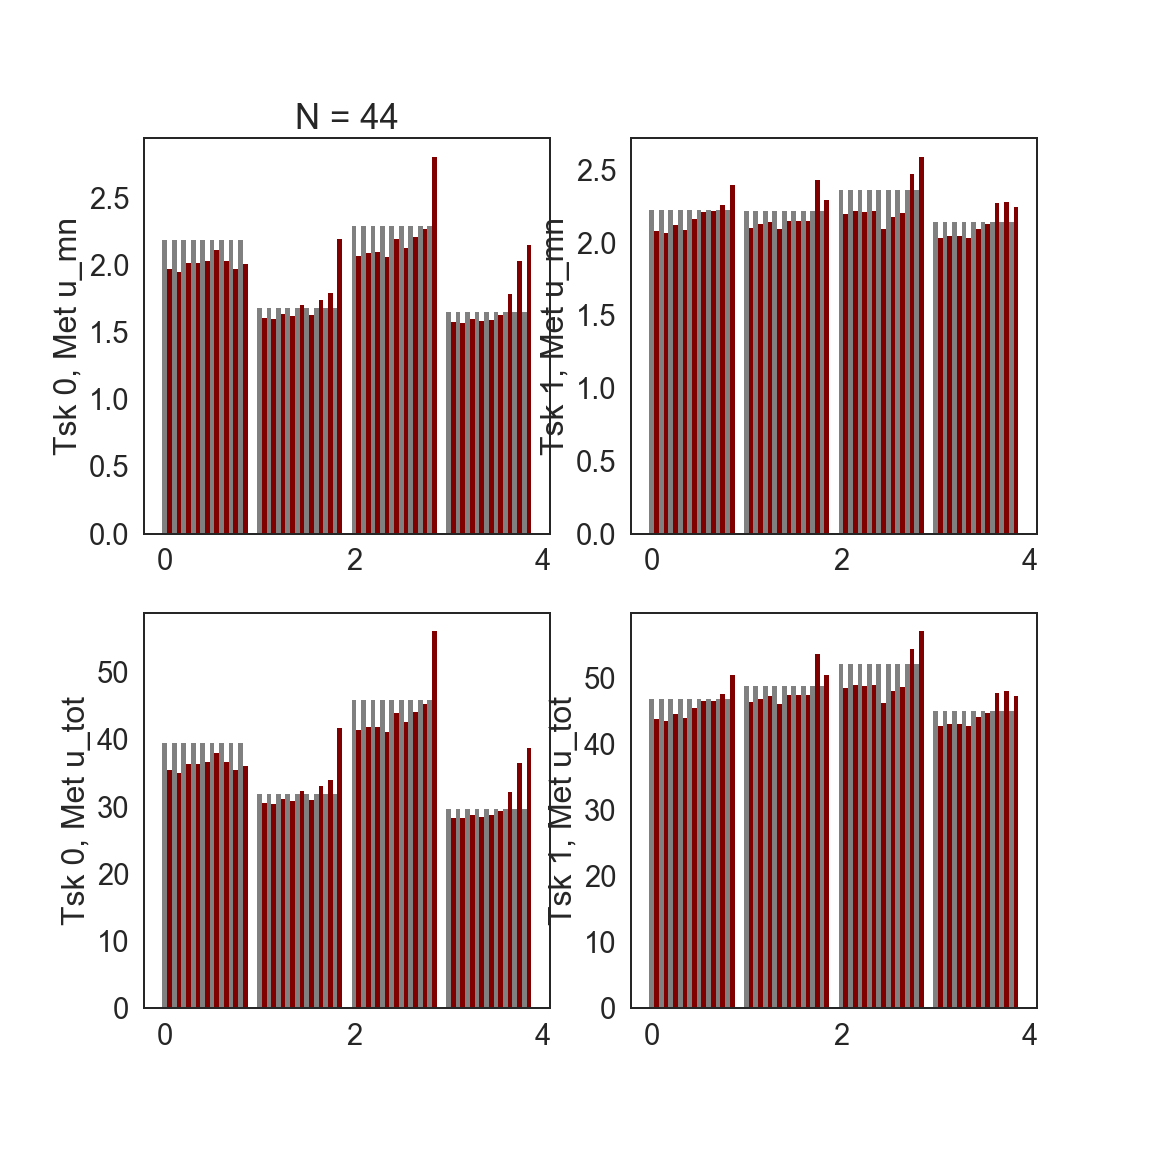

<IPython.core.display.Javascript object>


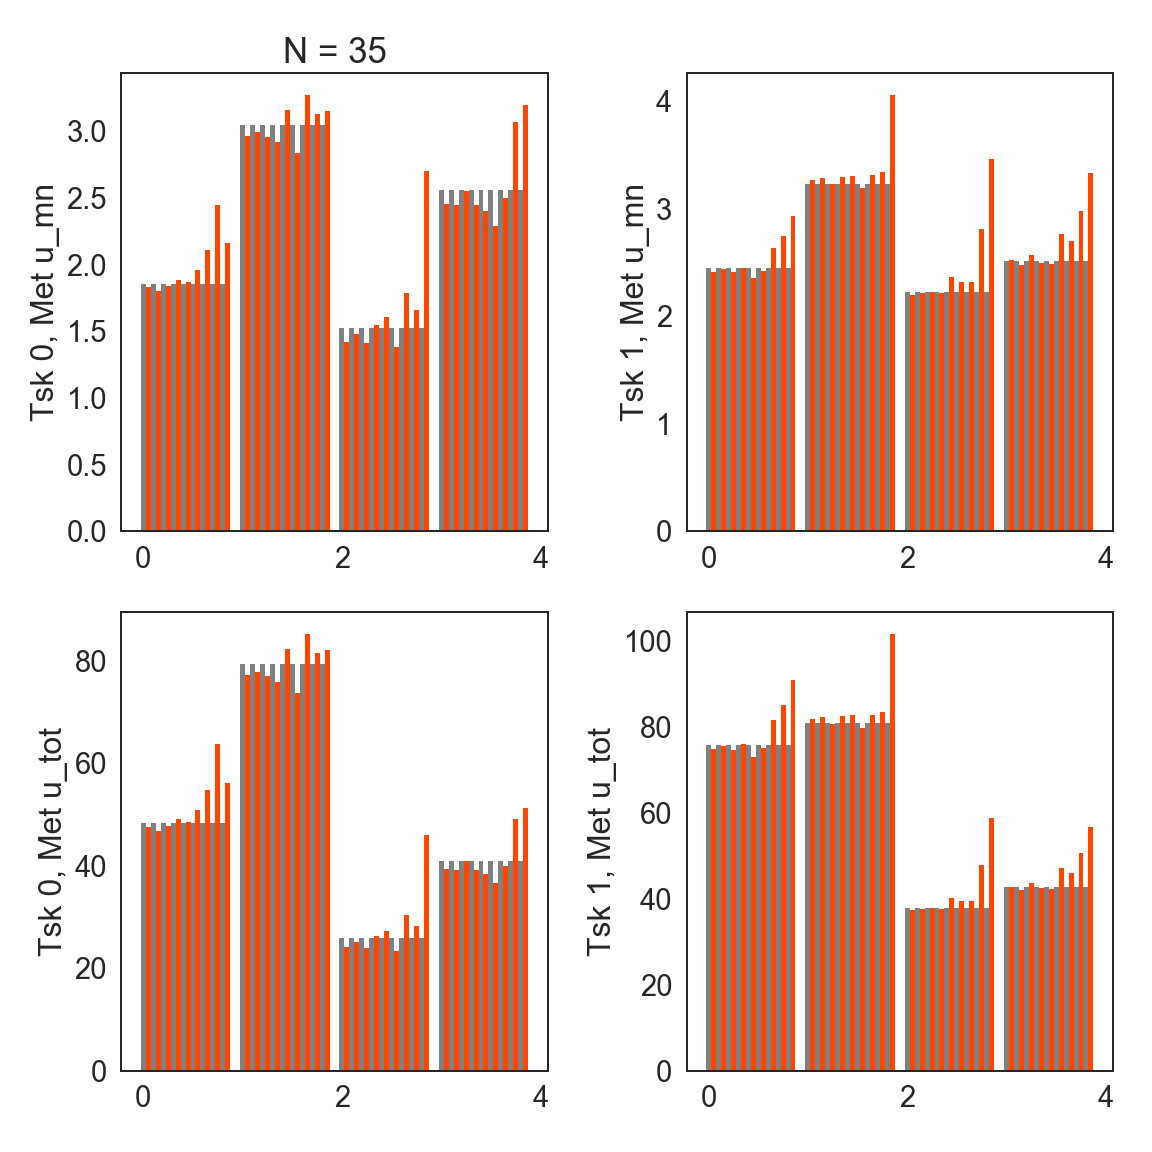

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 08:32:00.203973. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [20]:
f2, ax2 = plt.subplots(ncols = 2, nrows = 2)

for i_d in range(2):
    f, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(10, 10))
    K = util_fcns.get_decoder('grom', i_d)
    ax[0, 0].set_title('N = %d' %(K.shape[1]))
    
    for i_t in range(2):
        for i_m, met in enumerate(['u_mn', 'u_tot']):
            for i_s, state_noise in enumerate([0., .05, .1, .2, .5, 1., 2., 5., 10.]):
                #### For each task ### 
                zer = ZeroU[state_noise, i_t][met][i_d]
                tru = TrueU[state_noise, i_t][met][i_d]

                for tg, (z,t) in enumerate(zip(zer, tru)):
                    ax[i_m, i_t].bar(tg + .1*i_s, z, color='gray', width=.05)
                    ax[i_m, i_t].bar(tg + .1*i_s + .05, t, color=pref_colors[i_d], width=.05)

                ax[i_m, i_t].set_ylabel('Tsk %d, Met %s'%(i_t, met))
f.tight_layout()

<IPython.core.display.Javascript object>


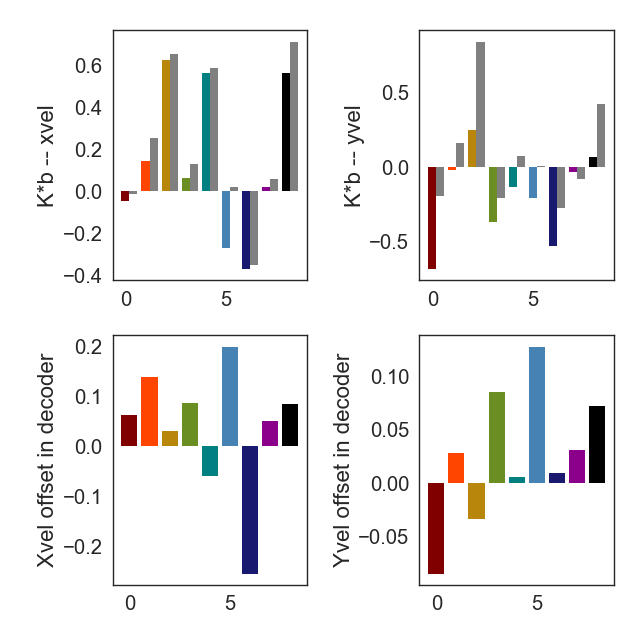

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 11:48:22.675659. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [68]:
#### Plot the Kb term? #####
####k = 7 x N, b = N x 1 ####

tmp_dir = '/Users/preeyakhanna/bmi_dynamics_code/dynamics_sims/exp_dynamics_models/'
f, ax = plt.subplots(nrows = 2, ncols=2, figsize = (8, 8))
for i_d in range(9):
    
    ### Load KF 
    K = util_fcns.get_decoder('grom', i_d)
    _, KG = util_fcns.get_grom_decoder(i_d)
    
    poff = KG[[3, 5], -1]
    ax[1, 0].bar(i_d, poff[0], color=pref_colors[i_d])
    ax[1, 1].bar(i_d, poff[1], color=pref_colors[i_d])
    ax[1, 0].set_ylabel('Xvel offset in decoder')
    ax[1, 1].set_ylabel('Yvel offset in decoder')
    
    ### Load offset; 
    tmp = pickle.load(open('%s%s_%d_shuffFalse.pkl'% (tmp_dir, 'grom', i_d), 'rb'))
    offs = tmp['offs']
    
    tmps = pickle.load(open('%s%s_%d_shuffTrue.pkl'% (tmp_dir, 'grom', i_d), 'rb'))
    offss = tmps['offs']
    
    ### Plot the 
    tmp2 = np.squeeze(np.array(np.dot(K, offs)))
    tmp2s = np.squeeze(np.array(np.dot(K, offss)))
    ax[0, 0].bar(i_d, tmp2[0],color=pref_colors[i_d], width=.4)
    ax[0, 1].bar(i_d, tmp2[1], color=pref_colors[i_d], width = .4)
    ax[0, 0].bar(i_d+.4, tmp2s[0],color='gray', width=.4)
    ax[0, 1].bar(i_d+.4, tmp2s[1], color='gray', width = .4)
    ax[0, 0].set_ylabel('K*b -- xvel')
    ax[0, 1].set_ylabel('K*b -- yvel')
    
    #ax[2].bar(i_d, np.linalg.norm(offs), color=pref_colors[i_d])
    #ax[3].bar(i_d, np.linalg.norm(offs)/float(len(offs)), color=pref_colors[i_d])
f.tight_layout()
    

In [65]:
poff

array([0.00842547, 0.        ])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 11:46:35.737224. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [444]:
cls = lqr_sim_Ridge.Combined_Curs_SimBrain_LQR_Data_ModelRidgeOffs(task='obs', R = 10, 
                                                                   dyn_freq=0., eig_decay = .1)

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 09:47:53.063825. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [445]:
cls.brain_target

array([1.11108988, 1.11113234, 1.        ])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 09:47:53.678592. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [446]:
pdb

Automatic pdb calling has been turned OFF


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 09:47:54.181917. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


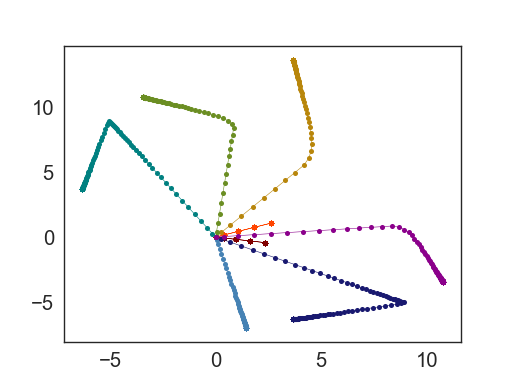

<IPython.core.display.Javascript object>


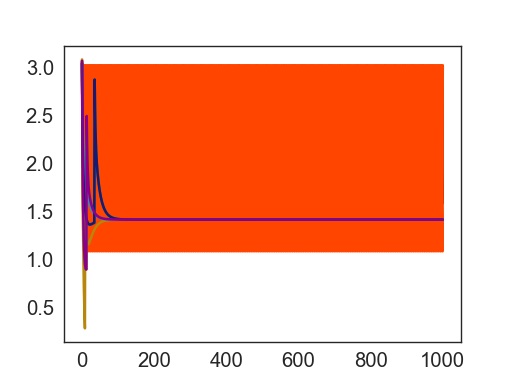

Starting rep: 0
Aborting OBS trial -- timeout time
Starting rep: 0
Aborting OBS trial -- timeout time
Starting rep: 0
Aborting OBS trial -- timeout time
Starting rep: 0
Aborting OBS trial -- timeout time
Starting rep: 0
Aborting OBS trial -- timeout time
Starting rep: 0
Aborting OBS trial -- timeout time
Starting rep: 0
Aborting OBS trial -- timeout time
Starting rep: 0
Aborting OBS trial -- timeout time


(<matplotlib.axes._subplots.AxesSubplot at 0x182de8e90>,
 array([1001, 1001, 1001, 1001, 1001, 1001, 1001, 1001]),
 array([2153.30053009, 1876.32568348, 1408.73084584, 1422.54347598,
        1433.61290279, 1428.93625311, 1433.61326812, 1422.54418225]),
 array([2.15114938, 1.87445123, 1.40732352, 1.42112235, 1.43218072,
        1.42750874, 1.43218109, 1.42112306]))

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 09:47:54.966524. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [447]:
cls.run_all_targets(nreps=1, plot_traj = True, subset_targs=np.arange(8), 
                    collect_brain_state_list = True)

<IPython.core.display.Javascript object>


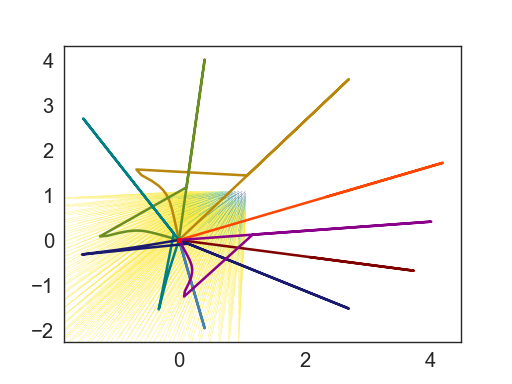

no zero dim: 2


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 09:48:08.567820. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [448]:
f, ax = plt.subplots()
for ix, x in enumerate(cls.brain_state_list):
    x = np.squeeze(np.array(x))
    plt.plot(x[0, :], x[1, :], '-', color=pref_colors[ix])
    plt.plot(x[0, 0], x[1, 0], 'r.')
    
# x = cls.brain_state_list[0]
# plot_flow_field_utils.flow_field_plot_top_dim(np.squeeze(np.array(cls.brain.A)), .1,
#                                         X = np.squeeze(np.array(x[:-5, :].T)), 
#                                       dim0 = 1, dim1 = 2, cmax = .5,scale =2, width = .005, ax = None)
    
    
plot_flow_field_utils.plot_flow(cls.brain.A, ax, nb_points=20, xmin=-1, xmax=1, ymin=-1, ymax=1, dim0 = 0, dim1 = 1,
    scale = .75, alpha=1.0, width=.005, cmax=1, setdimeq1 = True)

<IPython.core.display.Javascript object>


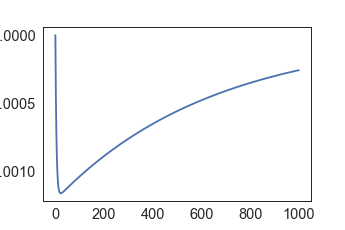

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-07 23:10:30.426823. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [393]:
f, ax = plt.subplots()
plt.plot(x[1, :])

<IPython.core.display.Javascript object>


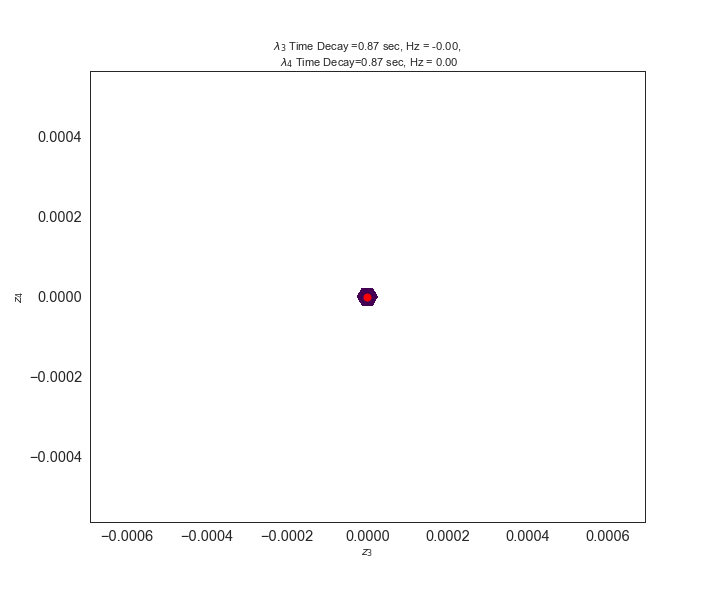

(<matplotlib.quiver.Quiver at 0x15edce190>,
 [[<matplotlib.lines.Line2D at 0x15ed62750>],
  [<matplotlib.lines.Line2D at 0x15ed62850>]])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-07 22:06:45.884787. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [194]:
plot_flow_field_utils.flow_field_plot_top_dim(np.squeeze(np.array(cls.brain.A)), .1, X = np.squeeze(np.array(x[:5,:].T)), 
                                              dim0 = 3, dim1 = 4, cmax = .1,scale =0.3, width = .00005, ax = None)

<IPython.core.display.Javascript object>


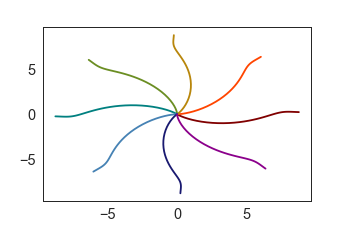

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-07 21:59:48.670160. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [170]:
f, ax = plt.subplots()
for ix, x in enumerate(cls.brain_state_list):
    x = np.squeeze(np.array(x))
    plt.plot(x[5, :], x[6, :], '-', color=pref_colors[ix])
    
# plot_flow_field_utils.plot_flow(cls.brain.A, ax, nb_points=20, xmin=-1, xmax=1, ymin=-1, ymax=1, dim0 = 0, dim1 = 1,
#     scale = .25, alpha=1.0, width=.005, cmax=.1, setdimeq1 = True)
    

In [107]:
cls.brain.A

matrix([[ 0.98985023, -0.01721972,  0.        ],
        [ 0.01721972,  0.98985023,  0.        ],
        [ 0.        ,  0.        ,  1.        ]])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-07 21:38:05.282060. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [197]:
i_d

8

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-07 22:11:26.481248. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


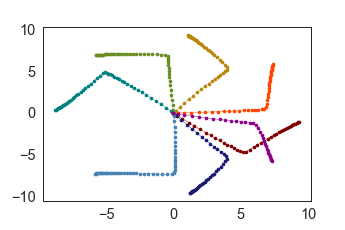

<IPython.core.display.Javascript object>


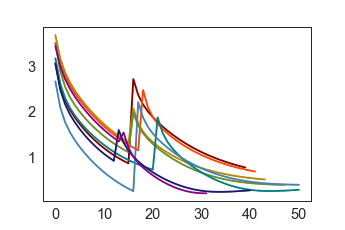

Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0


<IPython.core.display.Javascript object>


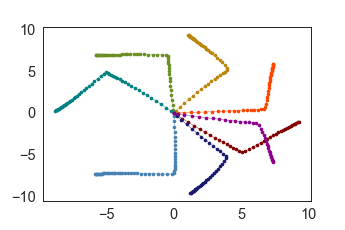

<IPython.core.display.Javascript object>


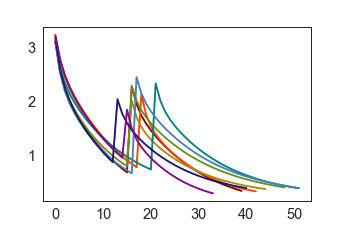

Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0


<IPython.core.display.Javascript object>


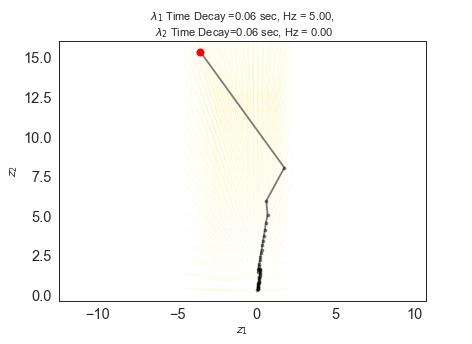

<IPython.core.display.Javascript object>


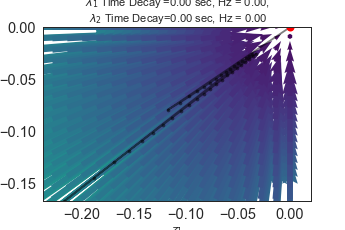

(<matplotlib.quiver.Quiver at 0x160e85350>,
 [[<matplotlib.lines.Line2D at 0x160e2f750>],
  [<matplotlib.lines.Line2D at 0x160e2f850>]])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-07 22:15:57.604851. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [203]:
i_d = 0
cls_true = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(i_d, False, R = 7, task=task)
cls_shuff = lqr_sim_Ridge.Combined_Curs_Brain_LQR_Data_ModelRidgeOffs(i_d, True, R = 7, task=task)

cls_true.run_all_targets(nreps=1, plot_traj = True, subset_targs=np.arange(8), collect_brain_state_list = True)
cls_shuff.run_all_targets(nreps=1, plot_traj = True, subset_targs=np.arange(8), collect_brain_state_list = True)
        
true_bs = cls_true.brain_state_list
shuff_bs = cls_shuff.brain_state_list
    
plot_flow_field_utils.flow_field_plot_top_dim(np.squeeze(np.array(cls_true.brain.A)), .1,
                                        X = np.squeeze(np.array(true_bs[0][:-5, :].T)), 
                                      dim0 = 1, dim1 = 2, cmax = .5,scale =2, width = .005, ax = None)

plot_flow_field_utils.flow_field_plot_top_dim(np.squeeze(np.array(cls_shuff.brain.A)), .1,
                                        X = np.squeeze(np.array(shuff_bs[0][:-5, :].T)), 
                                      dim0 = 1, dim1 = 2, cmax = .5,scale =2, width = .005, ax = None)

<IPython.core.display.Javascript object>


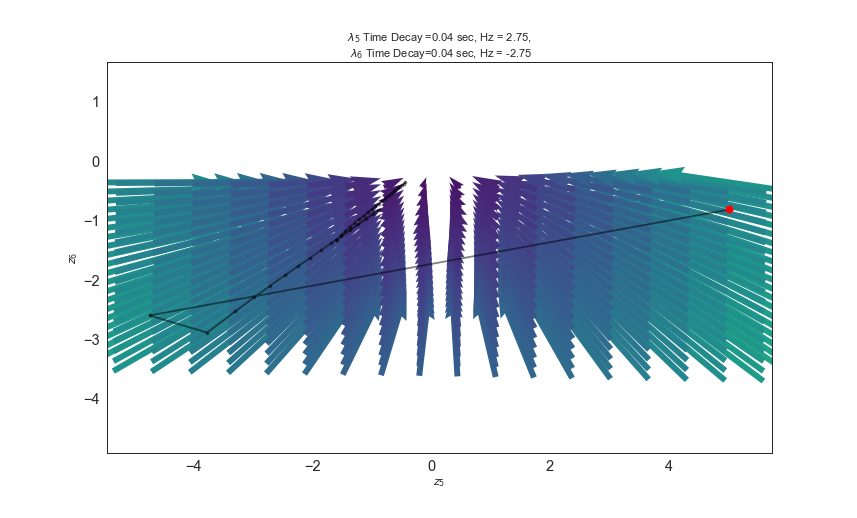

(<matplotlib.quiver.Quiver at 0x164cefa90>,
 [[<matplotlib.lines.Line2D at 0x165178290>],
  [<matplotlib.lines.Line2D at 0x165178390>]])

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-07 22:25:27.794792. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [230]:
plot_flow_field_utils.flow_field_plot_top_dim(np.squeeze(np.array(cls_true.brain.A)), .1,
                                        X = np.squeeze(np.array(true_bs[0][:-5, :].T)), 
                                      dim0 = 5, dim1 = 6, cmax = 10,scale =2, width = .1, ax = None)

# plot_flow_field_utils.flow_field_plot_top_dim(np.squeeze(np.array(cls_shuff.brain.A)), .1,
#                                         X = np.squeeze(np.array(shuff_bs[0][:-5, :].T)), 
#                                       dim0 = 2, dim1 = 3, cmax = .5,scale =1., width = .005, ax = None)

In [98]:
plot_generated_models.plot_eigs_from_LDS()

NameError: name 'plot_generated_models' is not defined

> <ipython-input-98-5ef242096c39>(1)<module>()
----> 1 plot_generated_models.plot_eigs_from_LDS()

ipdb> c


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-08 18:34:55.472198. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [32]:
########## LDS LQR ########
ZeroU = dict();
TrueU = dict();

for i_s, state_noise in enumerate([0., .05, .1, .2, .5, 1.]):#, 2., 5., 10.]):
    for i in range(2):
        TrueU[state_noise, i] = dict(u_mn= [], u_tot =[])
        ZeroU[state_noise, i] = dict(u_mn= [], u_tot =[])

    for i_d in range(2):
        for tsk in range(2):
            if tsk == 0:
                task = 'co'
            elif tsk == 1:
                task = 'obs'

            KG = util_fcns.get_decoder('grom', i_d)
            cls_true = lqr_simulation.Combined_Curs_Brain_LQR_Simulation_Data_Driven(i_d, task=task, zeroA = False, 
                                                                                 R = .001, 
                                                                                 keep_offset = True,
                                                                                    state_noise = state_noise)
            
            cls_shuff = lqr_simulation.Combined_Curs_Brain_LQR_Simulation_Data_Driven(i_d, task=task, zeroA = True, 
                                                                                 R = .001, 
                                                                                 keep_offset = True,
                                                                                     state_noise = state_noise)
            print('#######################')
            print('Starting Day %d' %(i_d))
            trl_tm, tot_u, mn_u = cls_true.run_all_targets(nreps=1, plot_traj = False, 
                                                           subset_targs=np.arange(8))
            TrueU[state_noise, tsk]['u_mn'].append(mn_u)
            TrueU[state_noise, tsk]['u_tot'].append(tot_u)

            trl_tm, tot_u, mn_u = cls_shuff.run_all_targets(nreps=1, plot_traj = False, 
                                                            subset_targs=np.arange(8))
            ZeroU[state_noise, tsk]['u_mn'].append(mn_u)
            ZeroU[state_noise, tsk]['u_tot'].append(tot_u)

#######################
Starting Day 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 1
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
#######################
Starting Day 1
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep: 0
Starting rep

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 15:57:47.282080. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



<IPython.core.display.Javascript object>


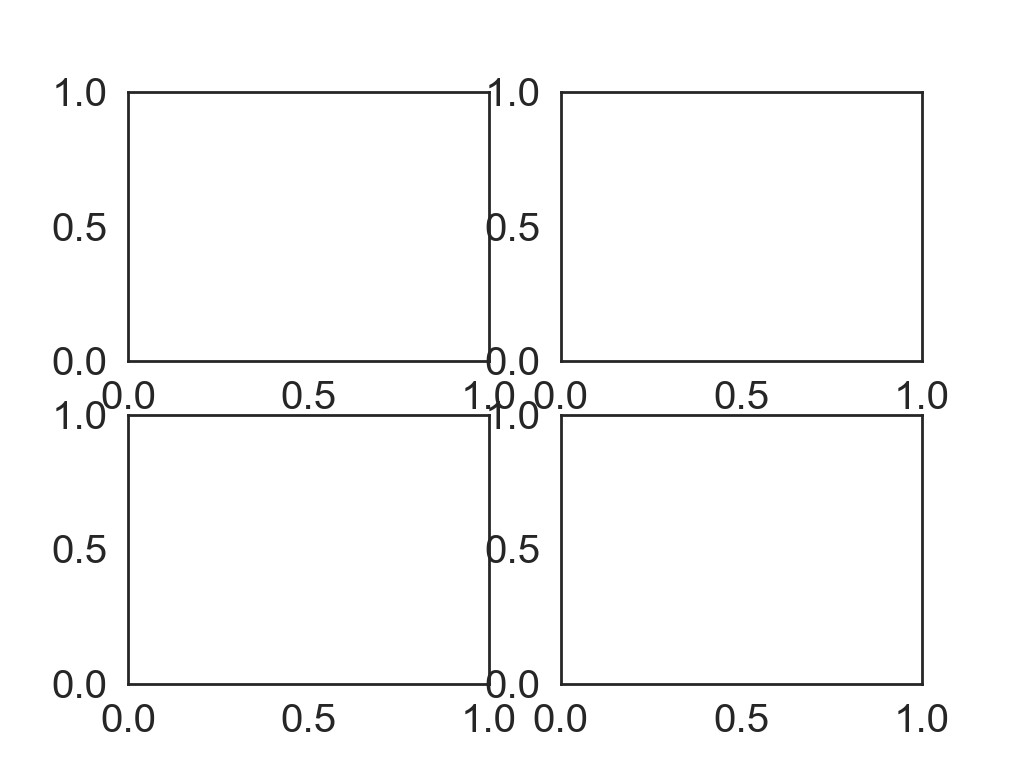

<IPython.core.display.Javascript object>


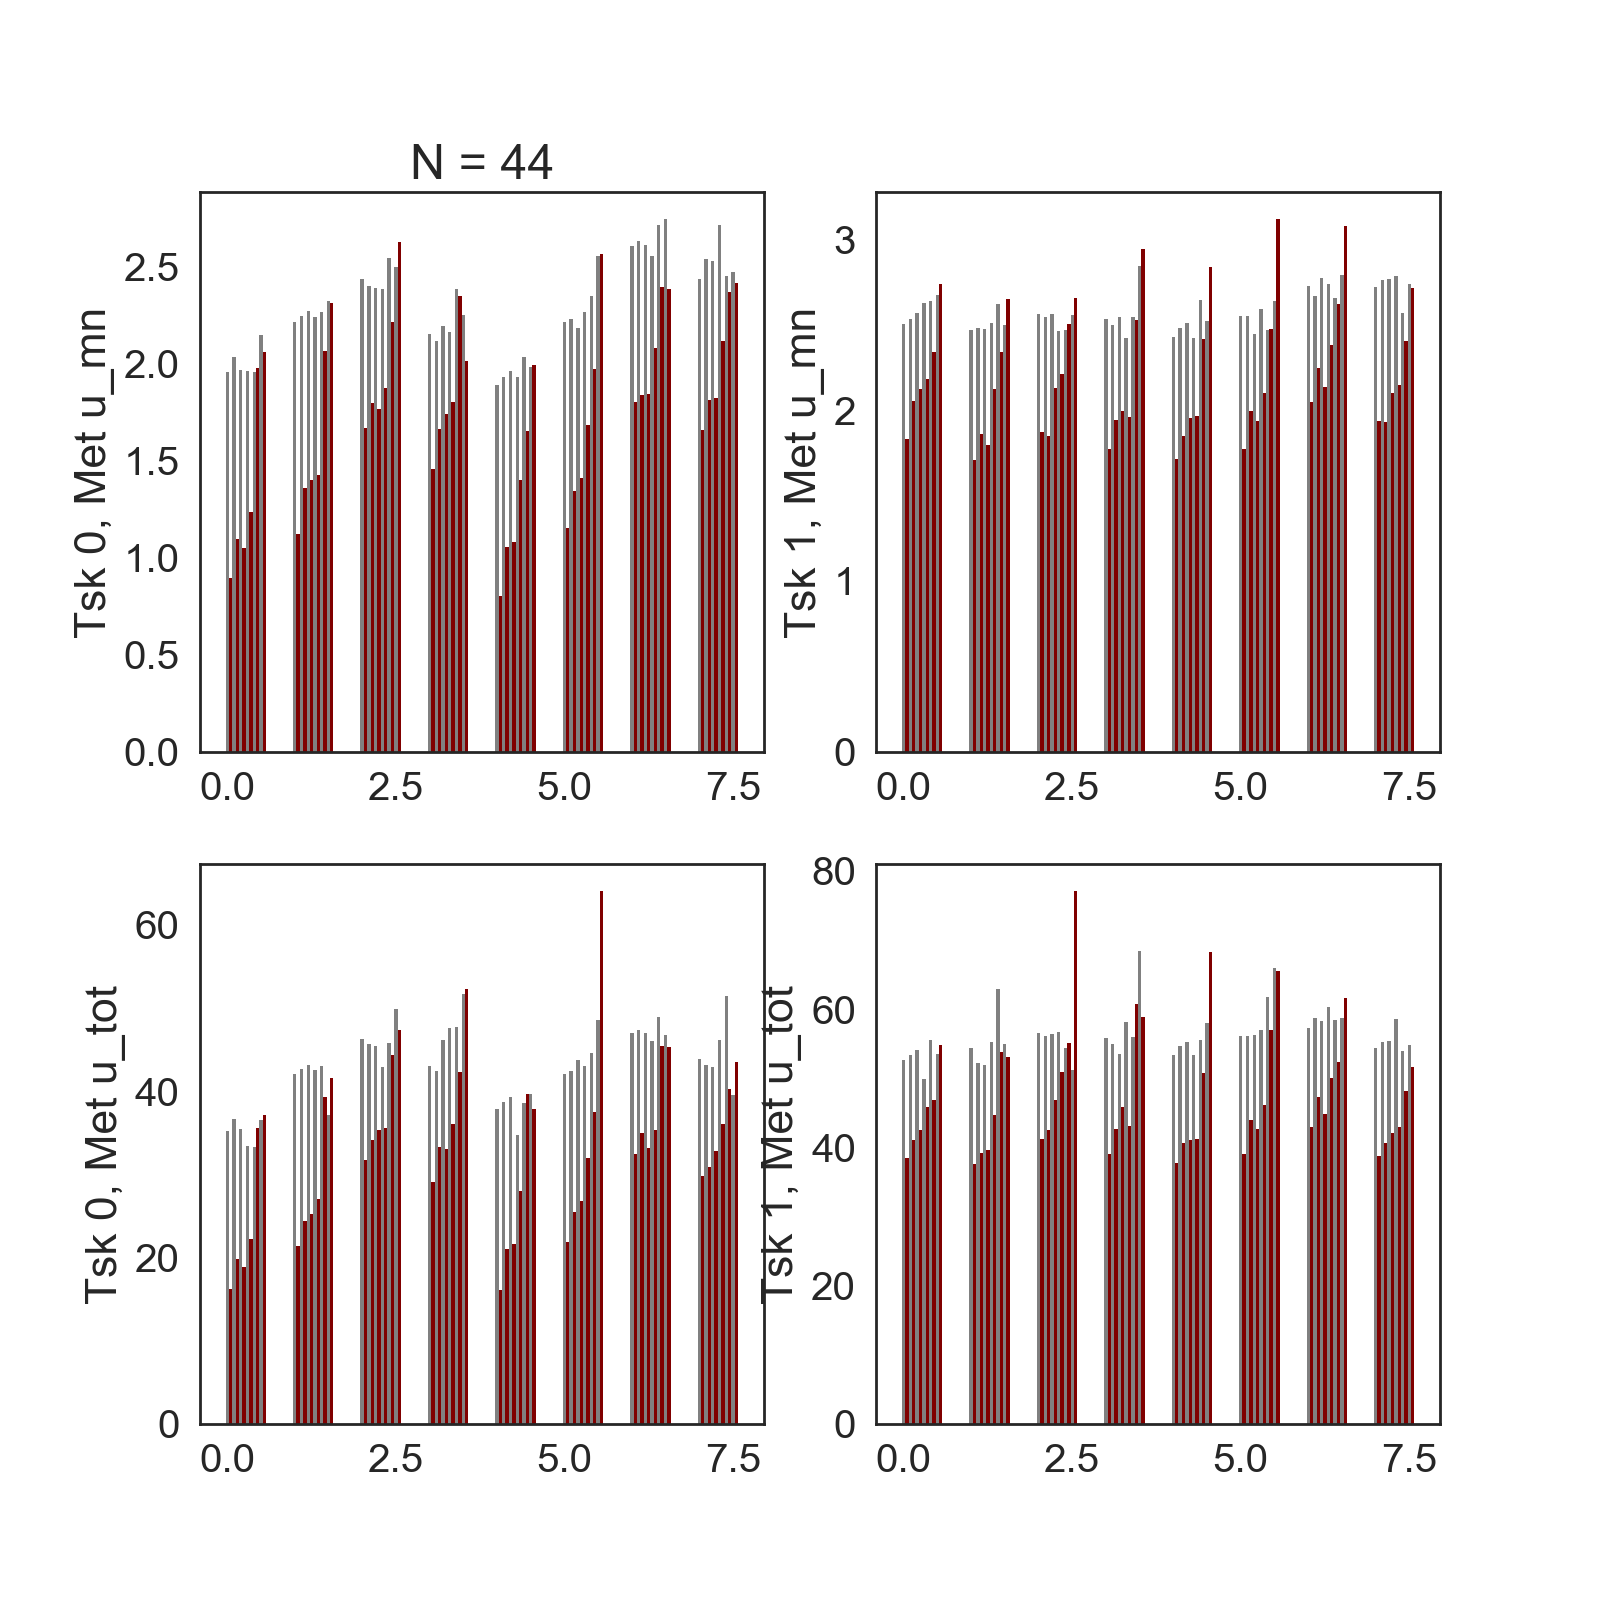

<IPython.core.display.Javascript object>


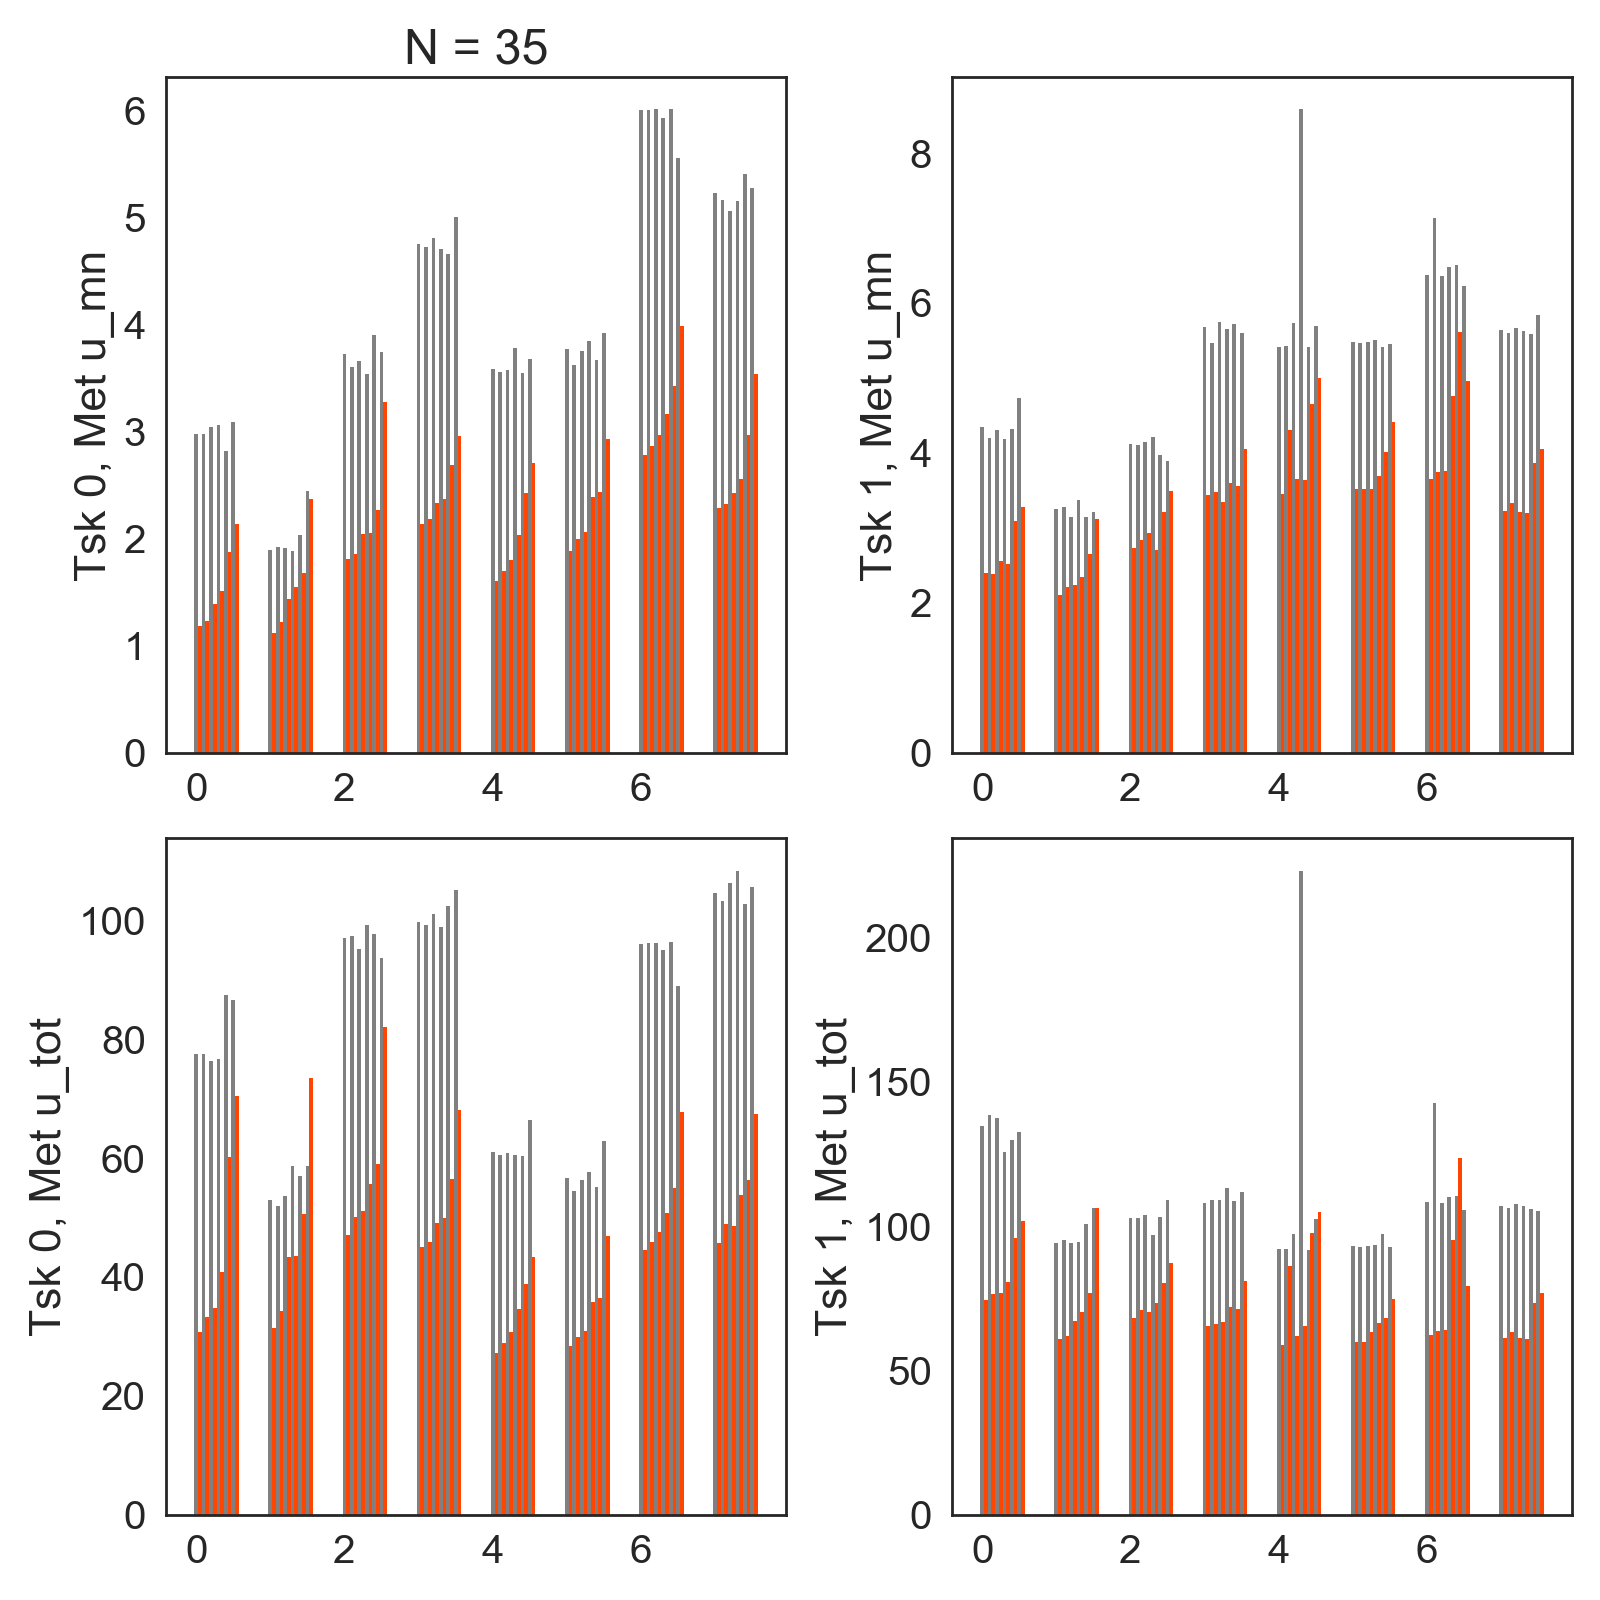

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/json/encoder.py:207: DeprecationWarning: Interpreting naive datetime as local 2020-07-09 15:58:08.675416. Please add timezone info to timestamps.
  chunks = self.iterencode(o, _one_shot=True)



In [33]:
f2, ax2 = plt.subplots(ncols = 2, nrows = 2)

for i_d in range(2):
    f, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(10, 10))
    K = util_fcns.get_decoder('grom', i_d)
    ax[0, 0].set_title('N = %d' %(K.shape[1]))
    
    for i_t in range(2):
        for i_m, met in enumerate(['u_mn', 'u_tot']):
            for i_s, state_noise in enumerate([0., .05, .1, .2, .5, 1.]):#, 2., 5., 10.]):
                #### For each task ### 
                zer = ZeroU[state_noise, i_t][met][i_d]
                tru = TrueU[state_noise, i_t][met][i_d]

                for tg, (z,t) in enumerate(zip(zer, tru)):
                    ax[i_m, i_t].bar(tg + .1*i_s, z, color='gray', width=.05)
                    ax[i_m, i_t].bar(tg + .1*i_s + .05, t, color=pref_colors[i_d], width=.05)

                ax[i_m, i_t].set_ylabel('Tsk %d, Met %s'%(i_t, met))
f.tight_layout()